# Algorithmic Trading COMP0051 2023/24 Coursework 2

#### 1. Time Series Prep [30 Points]

### (a)

In [2]:
import pandas as pd

# Load the data
sptl_df = pd.read_csv('SPTL.csv')
effr_df = pd.read_excel('EFFR_rates.xlsx')

# Convert EFFR annual rate to a daily rate assuming 252 trading days in a year
effr_df['Daily Rate'] = effr_df['Rate (%)'] / 100 / 252

# Process dates for merging
effr_df['Effective Date'] = pd.to_datetime(effr_df['Effective Date'])
effr_df.set_index('Effective Date', inplace=True)
sptl_df['Date'] = pd.to_datetime(sptl_df['Date'])
sptl_df.set_index('Date', inplace=True)

# Merge the datasets on the date index
merged_df = sptl_df.join(effr_df['Daily Rate'], how='left')
merged_df['Daily Rate'].fillna(method='ffill', inplace=True)

# Calculate the daily price change for SPTL
merged_df['Price Change'] = merged_df['Adj Close'].diff()

# Calculate the daily excess return per unit of SPTL
merged_df['Excess Return'] = merged_df['Price Change'] / merged_df['Adj Close'] - merged_df['Daily Rate']

merged_df.head(5)


c:\Users\lyakh\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\lyakh\AppData\Local\Temp\ipykernel_28852\710385673.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Daily Rate'].fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,Daily Rate,Price Change,Excess Return
Date,,,,,,,,,
2014-01-02,29.924999,30.070000,29.924999,30.055,23.299057,25400,0.000003,NaN,NaN
2014-01-03,29.959999,30.105000,29.959999,30.035,23.283548,22000,0.000003,-0.015509,-0.000669
2014-01-06,30.110001,30.270000,30.110001,30.160,23.380453,3200,0.000003,0.096905,0.004142
2014-01-07,30.240000,30.260000,30.200001,30.260,23.457968,3800,0.000003,0.077515,0.003302
2014-01-08,30.075001,30.184999,30.075001,30.150,23.372698,14800,0.000003,-0.085270,-0.003651


### (b)

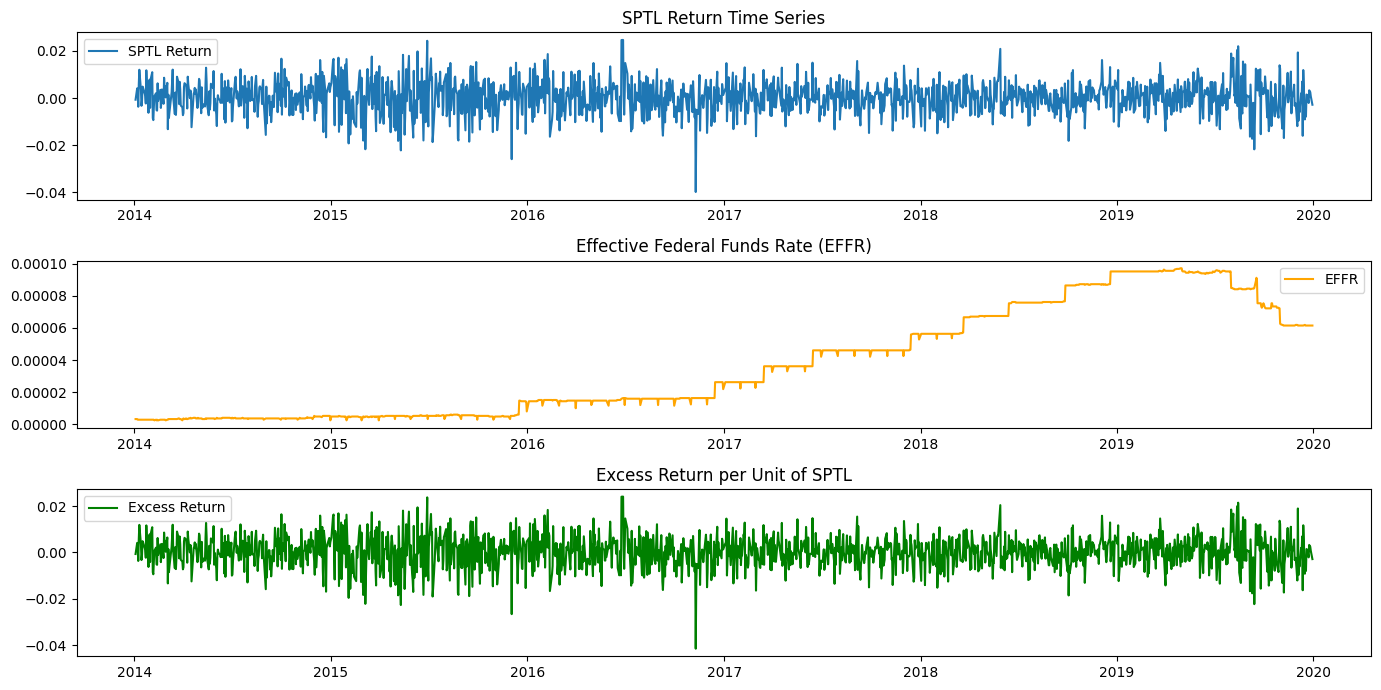

In [3]:
import matplotlib.pyplot as plt

# Calculate the daily return for SPTL
merged_df['SPTL Return'] = merged_df['Adj Close'].pct_change()

# Remove the NaN values for plotting
plot_df = merged_df.dropna(subset=['SPTL Return', 'Daily Rate', 'Excess Return'])

# Plotting
plt.figure(figsize=(14, 7))

# SPTL return time series
plt.subplot(3, 1, 1)
plt.plot(plot_df.index, plot_df['SPTL Return'], label='SPTL Return')
plt.title('SPTL Return Time Series')
plt.legend()

# EFFR time series
plt.subplot(3, 1, 2)
plt.plot(plot_df.index, plot_df['Daily Rate'], label='EFFR', color='orange')
plt.title('Effective Federal Funds Rate (EFFR)')
plt.legend()

# Excess return per unit of SPTL
plt.subplot(3, 1, 3)
plt.plot(plot_df.index, plot_df['Excess Return'], label='Excess Return', color='green')
plt.title('Excess Return per Unit of SPTL')
plt.legend()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


#### 2. Trading Strategies [45 Points]